## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz , process


c:\Hrishin Personal\certificates\learning materials\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Importing Data

In [3]:
menu = pd.read_csv(r"C:\Users\afiroz\Downloads\menu.csv")
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

If you don't know what is that information about i recommend reading this article 
https://www.fda.gov/food/new-nutrition-facts-label/how-understand-and-use-nutrition-facts-label

## Exploratory Data Analysis


#### Q1 | What is the 95% average calories each category has?

but first let's see tha distribution of each category

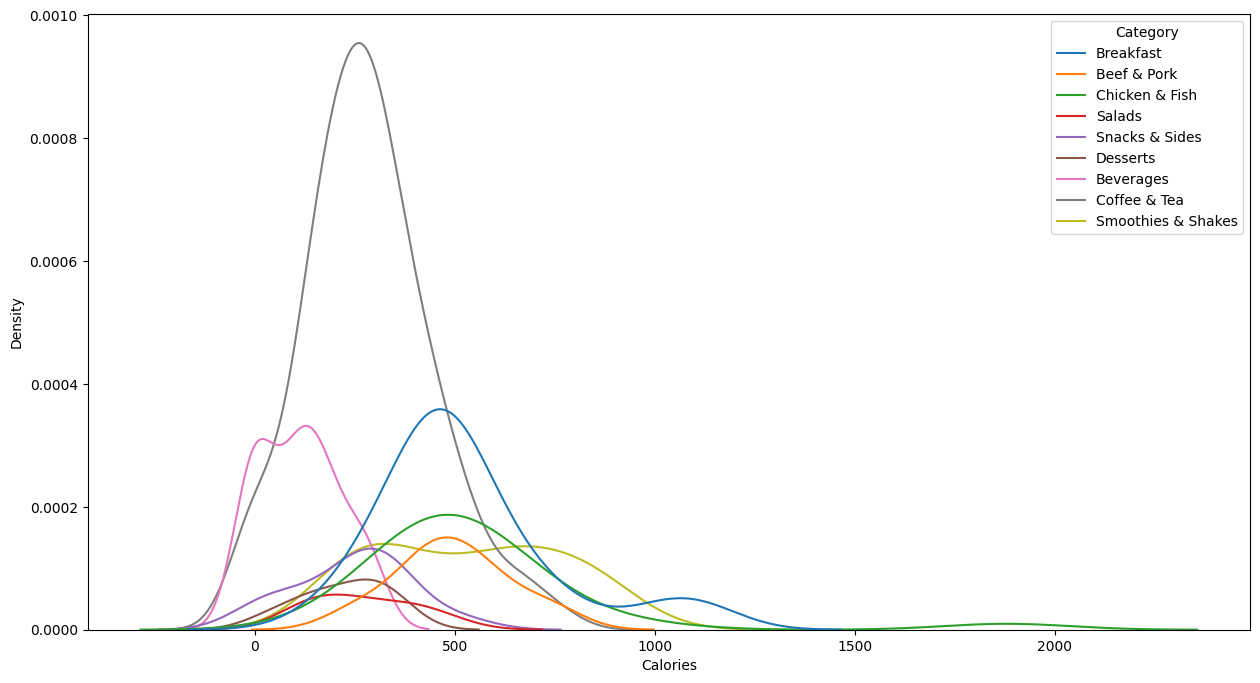

In [4]:
plt.figure(figsize=(15,8))
sns.kdeplot(data  = menu , x = 'Calories' , hue = 'Category'  )
plt.show()

In [5]:
menu.iloc[menu[menu['Category'] == 'Chicken & Fish']['Calories'].idxmax()]

Category                                       Chicken & Fish
Item                             Chicken McNuggets (40 piece)
Serving Size                                  22.8 oz (646 g)
Calories                                                 1880
Calories from Fat                                        1060
Total Fat                                               118.0
Total Fat (% Daily Value)                                 182
Saturated Fat                                            20.0
Saturated Fat (% Daily Value)                             101
Trans Fat                                                 1.0
Cholesterol                                               265
Cholesterol (% Daily Value)                                89
Sodium                                                   3600
Sodium (% Daily Value)                                    150
Carbohydrates                                             118
Carbohydrates (% Daily Value)                              39
Dietary 

oh it's 40 piece of Chicken McNuggets !

In [6]:
def confidence_interval():
    categories = menu['Category'].unique()
    X_bars  , LCLs , UPCs = [] , [] , [] 
    for c in categories: 
        c_df = menu[menu['Category'] == c]['Calories']
        X_bar , std = np.mean(c_df) , np.std(c_df)
        LCL , UPC = max(X_bar - ( 1.96 * std) , 0) ,  X_bar + ( 1.96 * std)
        LCLs.append(LCL)
        UPCs.append(UPC)    
        X_bars.append(X_bar)
    return pd.DataFrame({'Category' : categories , 'LCL' : LCLs ,'X-bar' : X_bars ,'UCL' : UPCs} )

In [7]:
confidence_interval()

,Category,LCL,X-bar,UCL
0,Breakfast,97.387105,526.666667,955.946229
1,Beef & Pork,226.327810,494.000000,761.672190
2,Chicken & Fish,0.000000,552.962963,1142.553368
3,Salads,41.987603,270.000000,498.012397
4,Snacks & Sides,0.000000,245.769231,512.741481
5,Desserts,26.012900,222.142857,418.272814
6,Beverages,0.000000,113.703704,304.491069
7,Coffee & Tea,0.000000,283.894737,591.575570
8,Smoothies & Shakes,87.074658,531.428571,975.782484


#### Q2 |  If you want to have a breakfast at mac what meal you should take?

According to the above article there is some Nutrients to :
   - get more of : Dietary Fiber, Vitamin , Calcium and Iron.
   - get less of: Saturated Fat, Sodium and Cholesterol.

In [8]:
menu['Protein (% Daily Value)'] = menu['Protein'] / 50
menu['goods'] = menu[['Vitamin C (% Daily Value)','Vitamin A (% Daily Value)' , 'Protein (% Daily Value)' , 'Dietary Fiber (% Daily Value)','Calcium (% Daily Value)' ,'Iron (% Daily Value)' ]].sum(axis = 1)
menu['bads']  =  menu[['Saturated Fat (% Daily Value)','Sodium (% Daily Value)','Cholesterol (% Daily Value)']].sum( axis = 1) 

In [9]:
bf_menu = menu[menu['Category'] == 'Breakfast'].copy()
bf_menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Protein (% Daily Value),goods,bads
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,17,3,17,10,0,25,15,0.34,67.34,143
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,17,3,18,6,0,25,8,0.36,56.36,55
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,17,2,14,8,0,25,10,0.28,60.28,90
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,17,2,21,15,0,30,15,0.42,77.42,183
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,17,2,21,6,0,25,10,0.42,58.42,95


In [10]:
pd.DataFrame({'Good Breakfast' : bf_menu.sort_values(['goods' , 'bads'] , ascending=[False , True])['Item'][:5]})

,Good Breakfast
40,Fruit & Maple Oatmeal
41,Fruit & Maple Oatmeal without Brown Sugar
32,Big Breakfast with Hotcakes (Large Biscuit)
31,Big Breakfast with Hotcakes (Regular Biscuit)
34,Big Breakfast with Hotcakes and Egg Whites (La...


#### Q3 |  What about ordering egg whites instead of whole eggs? 


In [12]:
bf_menu[(bf_menu['Item'] == 'Egg McMuffin') | (bf_menu['Item'] == 'Egg White Delight') ][['Item','goods' ,'bads']]

,Item,goods,bads
0,Egg McMuffin,67.34,143
1,Egg White Delight,56.36,55


as goods are slightly higher in the whole egg but bads are way higher, so we would choose the safer which is egg whites.

#### Q4 |  As a fitness guy we really care about protein , Where is protein  in MAC ?


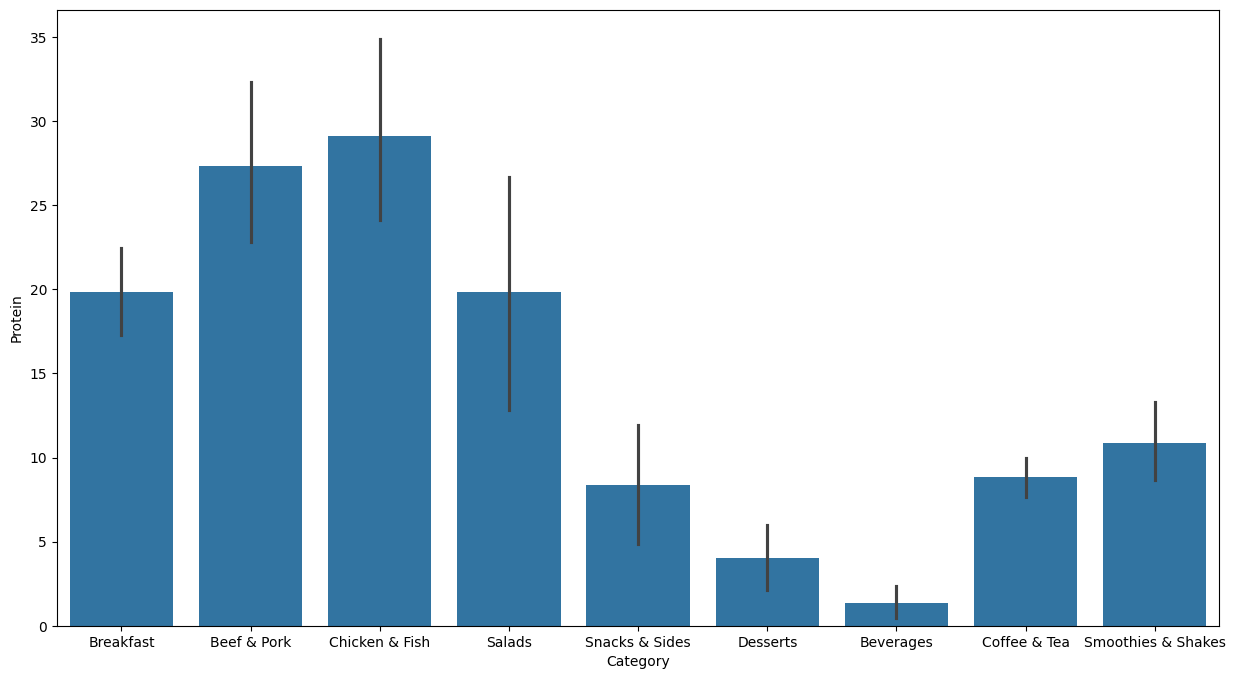

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(data  = menu , x = 'Category' , y =  'Protein'  )
plt.show()

In [14]:
cp_menu = menu[(menu['Category'] == 'Beef & Pork') | (menu['Category'] == 'Chicken & Fish' ) ].copy()
cp_menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Protein (% Daily Value),goods,bads
42,Beef & Pork,Big Mac,7.4 oz (211 g),530,240,27.0,42,10.0,48,1.0,...,13,9,24,6,2,25,25,0.48,71.48,116
43,Beef & Pork,Quarter Pounder with Cheese,7.1 oz (202 g),520,240,26.0,41,12.0,61,1.5,...,11,10,30,10,2,30,25,0.60,78.60,138
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,8 oz (227 g),600,260,29.0,45,13.0,63,1.5,...,12,12,37,6,15,25,30,0.74,88.74,157
45,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,8.3 oz (235 g),610,280,31.0,48,13.0,64,1.5,...,14,10,37,8,20,25,30,0.74,97.74,148
46,Beef & Pork,Quarter Pounder Deluxe,8.6 oz (244 g),540,250,27.0,42,11.0,54,1.5,...,13,9,29,10,8,25,30,0.58,86.58,122


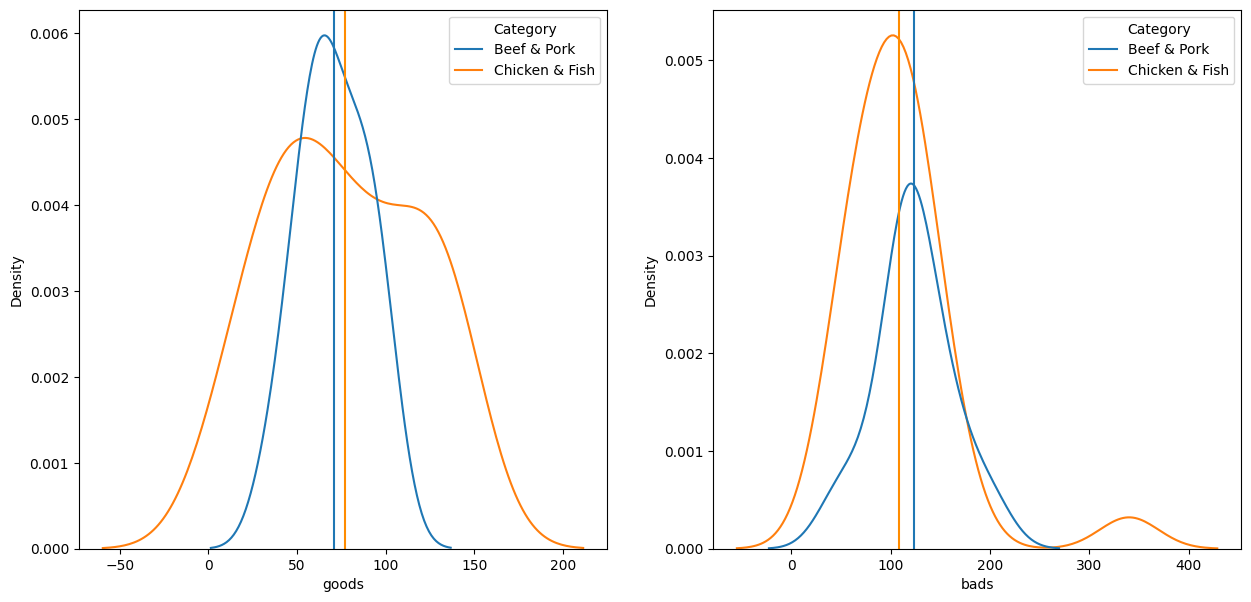

In [15]:
fig , ax = plt.subplots(ncols=2 ,figsize=(15,7) )
sns.kdeplot(data = cp_menu , x = 'goods' , hue = 'Category'  , ax = ax[0])
sns.kdeplot(data = cp_menu , x = 'bads' , hue = 'Category' ,  ax = ax[1])
ax[0].axvline(x=71)
ax[0].axvline(x=77.2 ,color = 'darkorange' )

ax[1].axvline(x=123.4 )
ax[1].axvline(x=108.6,color = 'darkorange' )

plt.show()

so as we are comparing value with one unit which is  $  percenatge Daily Value  $ , so we can subtract goods from bads for each category and the one with have more goods than bads is probably the best

In [16]:
cp_menu[cp_menu['Category'] == 'Beef & Pork'][['goods' , 'bads']].mean()

goods     71.013333
bads     123.400000
dtype: float64

In [17]:
71.10 - 123.4

-52.30000000000001

In [18]:
cp_menu[cp_menu['Category'] == 'Chicken & Fish'][['goods' , 'bads']].mean()

goods     77.285926
bads     108.666667
dtype: float64

In [19]:
77.2 - 108.6

-31.39999999999999